In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
pd.options.display.max_columns = 315

In [3]:
train = pd.read_csv('train.csv', index_col='Id')

In [4]:
test = pd.read_csv('test.csv', index_col = 'Id')

## EDA and Data Cleaning

One entry (445) has a NaN value for BsmtFin Type 2, while it has a value for BsmtFin SF 2, suggetsing this variable was input correctly. I will switch the value to 'Unf', corresponding with the fact that this entry has a value for Bsmt Unf SF

In [5]:
train.at[445, 'BsmtFin Type 2'] = 'Unf'

#### Bsmt Full Bath/Half Bath Null Values

For both of the entries with null values in these columns, I will replace the nulls with 0.0, assuming they do not have Bsmt Bathrooms

In [6]:
train['Bsmt Full Bath'].fillna(0.0, inplace=True)
train['Bsmt Half Bath'].fillna(0.0, inplace=True)

#### Bsmt Exposure

I've identified 3 entries which have Null values for Bmst Exposure, which have Basements. The most frequent value for the 'Bsmt Exposure' column is "No", so I will impute "No" for these 'Bsmt Exposure' null values  

In [7]:
train.at[67, 'Bsmt Exposure'] = 'No'
train.at[1797, 'Bsmt Exposure'] = 'No'
train.at[2780, 'Bsmt Exposure'] = 'No'


#### Bsmt Corrections

I filled the null values in the cells encoding Basement Variables as 'NA' or 0.0, depending on whether the variable was categorical or numerical

In [8]:
train['Bsmt Qual'].fillna('NA', inplace=True)
train['Bsmt Cond'].fillna('NA', inplace=True)
train['Bsmt Exposure'].fillna('NA', inplace=True)
train['BsmtFin Type 1'].fillna('NA', inplace=True)
train['BsmtFin Type 2'].fillna('NA', inplace=True)
train['BsmtFin SF 1'].fillna(0.0, inplace=True)
train['BsmtFin SF 2'].fillna(0.0, inplace=True)
train['Bsmt Unf SF'].fillna(0.0, inplace=True)
train['Total Bsmt SF'].fillna(0.0, inplace=True)

#### Gr Liv Area outliers

Text(0.5,1,'Scatterplot of Living Area vs. Sale Price')

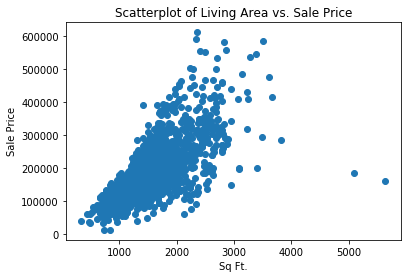

In [9]:
plt.scatter(train['Gr Liv Area'], train['SalePrice'])
plt.xlabel('Sq Ft.')
plt.ylabel('Sale Price')
plt.title('Scatterplot of Living Area vs. Sale Price')

In [10]:
train[train['Gr Liv Area']>4000]

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1499,908154235,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,Corner,Gtl,Edwards,Feedr,Norm,1Fam,2Story,10,5,2008,2008,Hip,ClyTile,Stucco,Stucco,Stone,796.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,5644.0,Unf,0.0,466.0,6110.0,GasA,Ex,Y,SBrkr,4692,950,0,5642,2.0,0.0,2,1,3,1,Ex,12,Typ,3,Gd,Attchd,2008.0,Fin,2.0,1418.0,TA,TA,Y,214,292,0,0,0,480,Gd,NaN,NaN,0,1,2008,New,160000
2181,908154195,20,RL,128.0,39290,Pave,NaN,IR1,Bnk,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1Story,10,5,2008,2009,Hip,CompShg,CemntBd,CmentBd,Stone,1224.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,4010.0,Unf,0.0,1085.0,5095.0,GasA,Ex,Y,SBrkr,5095,0,0,5095,1.0,1.0,2,1,2,1,Ex,15,Typ,2,Gd,Attchd,2008.0,Fin,3.0,1154.0,TA,TA,Y,546,484,0,0,0,0,NaN,NaN,Elev,17000,10,2007,New,183850


The points with the 2 largest Gr Liv Area are fairly extreme outliers, their prices are not reflective of the size of the living area.  I'm going to remove these entries.

In [11]:
train.drop([1499, 2181], axis=0, inplace=True)

#### Scatterplots

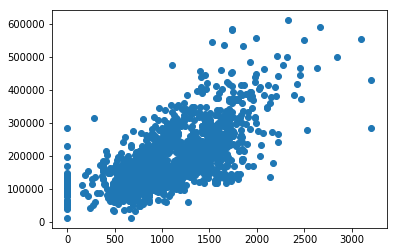

In [12]:
plt.scatter(train['Total Bsmt SF'], train['SalePrice'])

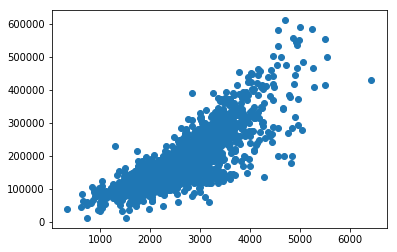

In [13]:
plt.scatter((train['Total Bsmt SF'] + train['Gr Liv Area']), train['SalePrice'])

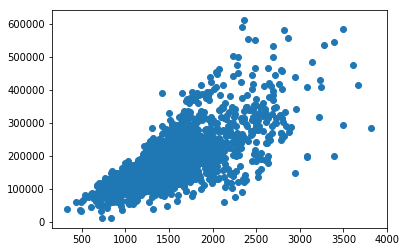

In [14]:
plt.scatter((train['Gr Liv Area']), train['SalePrice'])

#### Lot Frontage

For Lot Frontage, I want to inpute the median lot frontage for the missing values (represented by Nan).  I'm inputing the median because the SalePrice is skewed.

In [15]:
train['Lot Frontage'].median()

68.0

In [16]:
train['Lot Frontage'].fillna(train['Lot Frontage'].median(), inplace=True)

#### Alley

Going to assume the NaN values in this "Alley" column are the result of a house not having an alley.  I'm going to remove this column, there are too many null values for the column to carry significance

In [17]:
train.drop('Alley', axis=1, inplace=True)

#### Mas Vnr Type/Mas Vnr Area

For Masonry Veneer Type and Area, the null values seem to have been inputted incorrectly, as there are values that code for no Masonry Veneer Type ('None'), and no Area (0.0).  Thus, for these null values, I am going to set them to the default values representing no Masonry

In [18]:
train['Mas Vnr Area'].fillna(0.0, inplace=True)
train['Mas Vnr Type'].fillna('None', inplace=True)

#### Garage Corrections

The garage variable has many null values for 113 entries.  I will assume these null values represent houses that do not have garages, due to the 'Garage Area' and 'Garage Cars' values for each of these entries being 0, and will impute the variables correspondingly. I'm going to drop the 'Garage Yr Blt' column, under the assumption that the information captured in this variable will be encoded almost entirely by the 'Year Remod/Add' and 'Year Built' variables

In [19]:
train.drop('Garage Yr Blt', axis=1, inplace=True)

In [20]:
train['Garage Type'].fillna('NA', inplace=True)
train['Garage Finish'].fillna('NA', inplace=True)
train['Garage Qual'].fillna('NA', inplace=True)
train['Garage Cond'].fillna('NA', inplace=True)

Entry 2237 has a 'Detchd' value for the Garage Type variable, suggesting that the house has a garage.  However, the rest of the garage variable contain null values for this entry.  Since the house had a remodel, I'm going to assume that it has a garage.  I looked at the size of this house compared to the mean of houses sizes grouped by garage cars, to make a determination as to how many cars the garage could fit.

In [21]:
train.at[2237, 'Garage Finish'] = 'Unf'
train.at[2237, 'Garage Cars'] = 2.0
train.at[2237, 'Garage Area'] = 520.0
train.at[2237, 'Garage Qual'] = 'TA'
train.at[2237, 'Garage Cond'] = 'TA'

#### Pool QC & Misc Feature

Both of these columns comprise a ton of null values.  I'm going to drop these columns, because I'm assuming the data encoded in these columns is not significant

In [22]:
train.drop(labels=['Pool QC', 'Misc Feature'], axis=1, inplace=True)

#### Fence

I'm going to convert all of the NaN values in this column to NA, which is coded for according to the documentation

In [23]:
train['Fence'].fillna('NA', inplace=True)

#### Fireplace Quality

I'm going to fill all the NaN values for this column with 'NA', which is coded for according to the documentation

In [24]:
train['Fireplace Qu'].fillna('NA', inplace=True)

#### PID

I'm going to drop the PID column on the assumption that it does not contain any useful information

In [25]:
train.drop('PID', axis=1, inplace=True)

#### Street

I'm going to drop the 'Street' variable because it does not contain enough differentiated values.

In [26]:
train.drop('Street', axis=1, inplace=True)

#### Utilities

In [27]:
train.drop('Utilities', axis=1, inplace=True)

#### Roof Material

Dropping column because there is not much useful information coded (proportion of majority to non-majority values v skewed)

In [28]:
train.drop('Roof Matl', axis=1, inplace=True)

#### Separating out 'SalePrice' from training dataset

In [29]:
y_train = train[['SalePrice']]

In [30]:
train.drop('SalePrice', axis=1, inplace=True)

## Encoding Dummy Variables

#### Combining Conditions

The two condition columns encode the same information, I'm going to combine them to reduce the amount of dummy variables I create when I encode them.

Encoding a 'Feeder' column as a dummy variable for the Conditions columns. Will do the same for all of the conditions.

In [31]:
train.loc[(train['Condition 1'] == 'Feedr') | (train['Condition 2'] == 'Feedr'), 'Feedr'] = 1
train.loc[(train['Condition 1'] != 'Feedr') & (train['Condition 2'] != 'Feedr'), 'Feedr'] = 0

'Artery' variable

In [32]:
train.loc[(train['Condition 1'] == 'Artery') | (train['Condition 2'] == 'Artery'), 'Artery'] = 1
train.loc[(train['Condition 1'] != 'Artery') & (train['Condition 2'] != 'Artery'), 'Artery'] = 0

'PosN' variable

In [33]:
train.loc[(train['Condition 1'] == 'PosN') | (train['Condition 2'] == 'PosN'), 'PosN'] = 1
train.loc[(train['Condition 1'] != 'PosN') & (train['Condition 2'] != 'PosN'), 'PosN'] = 0

'PosA' variable

In [34]:
train.loc[(train['Condition 1'] == 'PosA') | (train['Condition 2'] == 'PosA'), 'PosA'] = 1
train.loc[(train['Condition 1'] != 'PosA') & (train['Condition 2'] != 'PosA'), 'PosA'] = 0

For the railroad conditions, I'm going to leave the distinction between the 'Near Railroad' and 'Railroad Adjacent' variables, but I am going to combine the entries coding for 'N/S Railroads' and 'E/W Railroads'. Upon creating dummy variables for these conditions, I noticed there were scant 'Near Railroad' values in the Conditions' dummy columns.  Therefore, I will be leaving 'RRN' values off of my columns.

In [35]:
train.loc[(train['Condition 1'] == 'RRAe') | (train['Condition 1'] == 'RRAn') | 
          (train['Condition 2'] == 'RRAe') | (train['Condition 2'] == 'RRAn'), 'RRA'] = 1
train.loc[(train['Condition 1'] != 'RRAe') & (train['Condition 1'] != 'RRAn') & 
          (train['Condition 2'] != 'RRAe') & (train['Condition 2'] != 'RRAn'), 'RRA'] = 0

Because condition column now has dummy variables, I'm going to drop it

In [36]:
train.drop(['Condition 1', 'Condition 2'], axis=1, inplace=True)


## More Dummies

In [37]:
train.head()

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Lot Shape,Land Contour,Lot Config,Land Slope,Neighborhood,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Fence,Misc Val,Mo Sold,Yr Sold,Sale Type,Feedr,Artery,PosN,PosA,RRA
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
109,60,RL,68.0,13517,IR1,Lvl,CulDSac,Gtl,Sawyer,1Fam,2Story,6,8,1976,2005,Gable,HdBoard,Plywood,BrkFace,289.0,Gd,TA,CBlock,TA,TA,No,GLQ,533.0,Unf,0.0,192.0,725.0,GasA,Ex,Y,SBrkr,725,754,0,1479,0.0,0.0,2,1,3,1,Gd,6,Typ,0,NA,Attchd,RFn,2.0,475.0,TA,TA,Y,0,44,0,0,0,0,NA,0,3,2010,WD,0.0,0.0,0.0,0.0,1.0
544,60,RL,43.0,11492,IR1,Lvl,CulDSac,Gtl,SawyerW,1Fam,2Story,7,5,1996,1997,Gable,VinylSd,VinylSd,BrkFace,132.0,Gd,TA,PConc,Gd,TA,No,GLQ,637.0,Unf,0.0,276.0,913.0,GasA,Ex,Y,SBrkr,913,1209,0,2122,1.0,0.0,2,1,4,1,Gd,8,Typ,1,TA,Attchd,RFn,2.0,559.0,TA,TA,Y,0,74,0,0,0,0,NA,0,4,2009,WD,0.0,0.0,0.0,0.0,0.0
153,20,RL,68.0,7922,Reg,Lvl,Inside,Gtl,NAmes,1Fam,1Story,5,7,1953,2007,Gable,VinylSd,VinylSd,None,0.0,TA,Gd,CBlock,TA,TA,No,GLQ,731.0,Unf,0.0,326.0,1057.0,GasA,TA,Y,SBrkr,1057,0,0,1057,1.0,0.0,1,0,3,1,Gd,5,Typ,0,NA,Detchd,Unf,1.0,246.0,TA,TA,Y,0,52,0,0,0,0,NA,0,1,2010,WD,0.0,0.0,0.0,0.0,0.0
318,60,RL,73.0,9802,Reg,Lvl,Inside,Gtl,Timber,1Fam,2Story,5,5,2006,2007,Gable,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,384.0,384.0,GasA,Gd,Y,SBrkr,744,700,0,1444,0.0,0.0,2,1,3,1,TA,7,Typ,0,NA,BuiltIn,Fin,2.0,400.0,TA,TA,Y,100,0,0,0,0,0,NA,0,4,2010,WD,0.0,0.0,0.0,0.0,0.0
255,50,RL,82.0,14235,IR1,Lvl,Inside,Gtl,SawyerW,1Fam,1.5Fin,6,8,1900,1993,Gable,Wd Sdng,Plywood,None,0.0,TA,TA,PConc,Fa,Gd,No,Unf,0.0,Unf,0.0,676.0,676.0,GasA,TA,Y,SBrkr,831,614,0,1445,0.0,0.0,2,0,3,1,TA,6,Typ,0,NA,Detchd,Unf,2.0,484.0,TA,TA,N,0,59,0,0,0,0,NA,0,3,2010,WD,0.0,0.0,0.0,0.0,0.0


In [38]:
train_w_dummies = pd.get_dummies(train, prefix_sep='_', columns=['MS SubClass', 'MS Zoning','Land Contour', 'Lot Shape',
                                                               'Lot Config', 'Land Slope', 'Neighborhood', 
                                                               'Bldg Type', 'House Style', 'Overall Cond',
                                                               'Overall Qual', 'Roof Style', 
                                                               'Exterior 1st', 'Exterior 2nd','Mas Vnr Type',
                                                               'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual',
                                                               'Bsmt Cond','Bsmt Exposure', 'BsmtFin Type 1', 
                                                               'BsmtFin Type 2','Heating', 'Heating QC', 
                                                               'Central Air', 'Electrical',
                                                               'Kitchen Qual', 'Functional', 'Fireplace Qu',
                                                               'Garage Type', 'Garage Finish', 'Garage Qual',
                                                               'Garage Cond', 'Paved Drive', 'Fence', 
                                                               'Mo Sold', 'Sale Type'])

## Cleaning Testing Data

In [39]:
test.head()

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2658,902301120,190,RM,69.0,9142,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,2fmCon,2Story,6,8,1910,1950,Gable,CompShg,AsbShng,AsbShng,None,0.0,TA,Fa,Stone,Fa,TA,No,Unf,0.0,Unf,0.0,1020.0,1020.0,GasA,Gd,N,FuseP,908,1020,0,1928,0.0,0.0,2,0,4,2,Fa,9,Typ,0,NaN,Detchd,1910.0,Unf,1.0,440.0,Po,Po,Y,0,60,112,0,0,0,NaN,NaN,NaN,0,4,2006,WD
2718,905108090,90,RL,NaN,9662,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,Duplex,1Story,5,4,1977,1977,Gable,CompShg,Plywood,Plywood,None,0.0,TA,TA,CBlock,Gd,TA,No,Unf,0.0,Unf,0.0,1967.0,1967.0,GasA,TA,Y,SBrkr,1967,0,0,1967,0.0,0.0,2,0,6,2,TA,10,Typ,0,NaN,Attchd,1977.0,Fin,2.0,580.0,TA,TA,Y,170,0,0,0,0,0,NaN,NaN,NaN,0,8,2006,WD
2414,528218130,60,RL,58.0,17104,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,7,5,2006,2006,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,Gd,Av,GLQ,554.0,Unf,0.0,100.0,654.0,GasA,Ex,Y,SBrkr,664,832,0,1496,1.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,2006.0,RFn,2.0,426.0,TA,TA,Y,100,24,0,0,0,0,NaN,NaN,NaN,0,9,2006,New
1989,902207150,30,RM,60.0,8520,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,1Fam,1Story,5,6,1923,2006,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,Gd,TA,CBlock,TA,TA,No,Unf,0.0,Unf,0.0,968.0,968.0,GasA,TA,Y,SBrkr,968,0,0,968,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Detchd,1935.0,Unf,2.0,480.0,Fa,TA,N,0,0,184,0,0,0,NaN,NaN,NaN,0,7,2007,WD
625,535105100,20,RL,NaN,9500,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1963,1963,Gable,CompShg,Plywood,Plywood,BrkFace,247.0,TA,TA,CBlock,Gd,TA,No,BLQ,609.0,Unf,0.0,785.0,1394.0,GasA,Gd,Y,SBrkr,1394,0,0,1394,1.0,0.0,1,1,3,1,TA,6,Typ,2,Gd,Attchd,1963.0,RFn,2.0,514.0,TA,TA,Y,0,76,0,0,185,0,NaN,NaN,NaN,0,7,2009,WD


#### Drop Columns: PID, Street, Alley, Utilities, Garage Yr Blt, Pool QC, Misc Feature, Roof Material

In [40]:
test.drop(['PID', 'Street', 'Alley', 'Utilities', 'Garage Yr Blt', 'Pool QC', 'Misc Feature', 'Roof Matl'], axis=1, inplace=True)

#### Imputing Values for NaN's

In [41]:
test.head()

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Lot Shape,Land Contour,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Fence,Misc Val,Mo Sold,Yr Sold,Sale Type
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2658,190,RM,69.0,9142,Reg,Lvl,Inside,Gtl,OldTown,Norm,Norm,2fmCon,2Story,6,8,1910,1950,Gable,AsbShng,AsbShng,None,0.0,TA,Fa,Stone,Fa,TA,No,Unf,0.0,Unf,0.0,1020.0,1020.0,GasA,Gd,N,FuseP,908,1020,0,1928,0.0,0.0,2,0,4,2,Fa,9,Typ,0,NaN,Detchd,Unf,1.0,440.0,Po,Po,Y,0,60,112,0,0,0,NaN,0,4,2006,WD
2718,90,RL,NaN,9662,IR1,Lvl,Inside,Gtl,Sawyer,Norm,Norm,Duplex,1Story,5,4,1977,1977,Gable,Plywood,Plywood,None,0.0,TA,TA,CBlock,Gd,TA,No,Unf,0.0,Unf,0.0,1967.0,1967.0,GasA,TA,Y,SBrkr,1967,0,0,1967,0.0,0.0,2,0,6,2,TA,10,Typ,0,NaN,Attchd,Fin,2.0,580.0,TA,TA,Y,170,0,0,0,0,0,NaN,0,8,2006,WD
2414,60,RL,58.0,17104,IR1,Lvl,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,7,5,2006,2006,Gable,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,Gd,Av,GLQ,554.0,Unf,0.0,100.0,654.0,GasA,Ex,Y,SBrkr,664,832,0,1496,1.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,RFn,2.0,426.0,TA,TA,Y,100,24,0,0,0,0,NaN,0,9,2006,New
1989,30,RM,60.0,8520,Reg,Lvl,Inside,Gtl,OldTown,Norm,Norm,1Fam,1Story,5,6,1923,2006,Gable,Wd Sdng,Wd Sdng,None,0.0,Gd,TA,CBlock,TA,TA,No,Unf,0.0,Unf,0.0,968.0,968.0,GasA,TA,Y,SBrkr,968,0,0,968,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Detchd,Unf,2.0,480.0,Fa,TA,N,0,0,184,0,0,0,NaN,0,7,2007,WD
625,20,RL,NaN,9500,IR1,Lvl,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1963,1963,Gable,Plywood,Plywood,BrkFace,247.0,TA,TA,CBlock,Gd,TA,No,BLQ,609.0,Unf,0.0,785.0,1394.0,GasA,Gd,Y,SBrkr,1394,0,0,1394,1.0,0.0,1,1,3,1,TA,6,Typ,2,Gd,Attchd,RFn,2.0,514.0,TA,TA,Y,0,76,0,0,185,0,NaN,0,7,2009,WD


In [42]:
test['Fence'].fillna('NA', inplace=True)

In [43]:
test['Fireplace Qu'].fillna('NA', inplace=True)

In [44]:
test['Lot Frontage'].fillna(train['Lot Frontage'].median(), inplace=True)

In [45]:
test['Mas Vnr Type'].fillna('NA', inplace=True)
test['Mas Vnr Area'].fillna(0.0, inplace=True)

In [46]:
test['Bsmt Qual'].fillna('NA', inplace=True)
test['Bsmt Cond'].fillna('NA', inplace=True)
test['Bsmt Exposure'].fillna('NA', inplace=True)
test['BsmtFin Type 1'].fillna('NA', inplace=True)
test['BsmtFin Type 2'].fillna('NA', inplace=True)
test['BsmtFin SF 1'].fillna(0.0, inplace=True)
test['BsmtFin SF 2'].fillna(0.0, inplace=True)
test['Bsmt Unf SF'].fillna(0.0, inplace=True)
test['Total Bsmt SF'].fillna(0.0, inplace=True)

In [47]:
test['Garage Type'].fillna('NA', inplace=True)
test['Garage Finish'].fillna('NA', inplace=True)
test['Garage Qual'].fillna('NA', inplace=True)
test['Garage Cond'].fillna('NA', inplace=True)

## Creating Dummy Variable for Test Data

#### Condition

In [48]:
test.loc[(test['Condition 1'] == 'Feedr') | (test['Condition 2'] == 'Feedr'), 'Feedr'] = 1
test.loc[(test['Condition 1'] != 'Feedr') & (test['Condition 2'] != 'Feedr'), 'Feedr'] = 0

test.loc[(test['Condition 1'] == 'Artery') | (test['Condition 2'] == 'Artery'), 'Artery'] = 1
test.loc[(test['Condition 1'] != 'Artery') & (test['Condition 2'] != 'Artery'), 'Artery'] = 0

test.loc[(test['Condition 1'] == 'PosN') | (test['Condition 2'] == 'PosN'), 'PosN'] = 1
test.loc[(test['Condition 1'] != 'PosN') & (test['Condition 2'] != 'PosN'), 'PosN'] = 0

test.loc[(test['Condition 1'] == 'PosA') | (test['Condition 2'] == 'PosA'), 'PosA'] = 1
test.loc[(test['Condition 1'] != 'PosA') & (test['Condition 2'] != 'PosA'), 'PosA'] = 0

test.loc[(test['Condition 1'] == 'RRAe') | (test['Condition 1'] == 'RRAn') | 
          (test['Condition 2'] == 'RRAe') | (test['Condition 2'] == 'RRAn'), 'RRA'] = 1
test.loc[(test['Condition 1'] != 'RRAe') & (test['Condition 1'] != 'RRAn') & 
          (test['Condition 2'] != 'RRAe') & (test['Condition 2'] != 'RRAn'), 'RRA'] = 0

test.drop(['Condition 1', 'Condition 2'], axis=1, inplace=True)


#### Rest of variables

In [49]:
test_w_dummies = pd.get_dummies(test, prefix_sep='_', columns=['MS SubClass', 'MS Zoning','Land Contour', 'Lot Shape',
                                                               'Lot Config', 'Land Slope', 'Neighborhood', 
                                                               'Bldg Type', 'House Style', 'Overall Cond',
                                                               'Overall Qual', 'Roof Style', 
                                                               'Exterior 1st', 'Exterior 2nd','Mas Vnr Type',
                                                               'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual',
                                                               'Bsmt Cond','Bsmt Exposure', 'BsmtFin Type 1', 
                                                               'BsmtFin Type 2','Heating', 'Heating QC', 
                                                               'Central Air', 'Electrical',
                                                               'Kitchen Qual', 'Functional', 'Fireplace Qu',
                                                               'Garage Type', 'Garage Finish', 'Garage Qual',
                                                               'Garage Cond', 'Paved Drive', 'Fence', 
                                                               'Mo Sold', 'Sale Type'])

#### Test columns additions (To correct to training data)

In [50]:
col_to_be_added = np.setdiff1d(train_w_dummies.columns,test_w_dummies.columns)
col_to_be_dropped = np.setdiff1d(test_w_dummies.columns,train_w_dummies.columns)
test_w_dummies.drop(col_to_be_dropped,axis=1,inplace=True)
for col in col_to_be_added:
    test_w_dummies[col] = 0

In [51]:
train_w_dummies.to_csv('./Clean_Training_Data')

In [52]:
test_w_dummies.to_csv('./Clean_Testing_Data')

In [53]:
y_train.to_csv('./Prices')

In [60]:
train['Overall Cond']

Id
109     8
544     5
153     7
318     5
255     8
138     6
2827    5
145     5
1942    5
1956    5
1044    5
2752    5
807     7
1177    5
1480    5
324     5
1311    5
770     6
2063    5
69      5
2062    5
351     5
2393    5
12      7
2339    5
624     6
86      8
1534    6
2243    6
1957    7
       ..
2810    5
2872    5
1072    5
1654    6
2394    5
2212    7
2628    5
2526    7
969     5
306     7
25      6
311     7
300     5
2775    5
2862    5
525     5
2730    5
1892    5
2288    6
2728    4
1065    5
2842    4
2011    6
1140    5
1051    5
1587    5
785     5
916     6
639     5
10      5
Name: Overall Cond, Length: 2049, dtype: int64

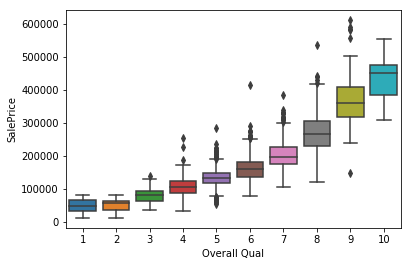

In [61]:
sns.boxplot(train['Overall Qual'], y_train['SalePrice'])